# Features of networks

The idea is the same as with analysis of trajectories. 
As **input** we give networks and some features of networks. 
As **output** we would like to get networks classification, e.g. in known categories such as 
1. Watts-Strogatz graphs
2. Barabasi Albert graphs 

Another possible input could be etworks with hidden features, e.g. networks with weighted edges and possible output could be classification of networks into specific groups (networks from category 1, category 2). 

**Critical comment here:** why the same type of problem could not be done using other tools such as random forest etc.

One good review on this topic is from "Machine learning in network centrality measures: Tutorial and outlook" ACM 2019


In [ ]:
# call module from Andi for trajectories generation and analysis 
# call new module from network-Andi for networks generation and analysis

import numpy as np
import torch
import os
import sys
sys.path.append('../')

from src.features import Q_measure, dist_distribution, convex_hull
from src.andi_tools import Andi_to_xy
from src.training import FeedForward

#from src.netfeatures import degree, betweenness, clustering
#from src.andi_tools import Andi_to_xy
#from src.training import FeedForward


%load_ext autoreload
%autoreload 2


Examples of possible local network measures: 
1. `degree_centrality(G)`, the degree centrality for nodes.
2. `in_degree_centrality(G)`, the in-degree centrality for nodes.
3. `out_degree_centrality(G)`, the out-degree centrality for nodes
4. `betweenness_centrality(G)`, the shortest-path betweenness centrality for nodes. Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through 
5. ` closeness_centrality(G)`, closeness centrality for nodes.  Closeness centrality  of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes
6. spectral measures, such as  `eigenvector_centrality(G)`, the eigenvector centrality for the graph G. Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for node i is $x$: $Ax = \lambda x$, where $\lambda$ is eigenvalue.
7. spectral measures based `Katz centrality` or `Page rank`etc.

Other network measures are described in the networkx documentation https://networkx.github.io/documentation/stable/reference/generators.html 

{0: 0.21428571428571427, 1: 0.07142857142857142, 2: 0.07142857142857142, 3: 0.07142857142857142, 4: 0.14285714285714285, 5: 0.14285714285714285, 6: 0.21428571428571427, 7: 0.07142857142857142, 8: 0.07142857142857142, 9: 0.07142857142857142, 10: 0.21428571428571427, 11: 0.21428571428571427, 12: 0.14285714285714285, 13: 0.2857142857142857, 14: 0.14285714285714285}
[(0, 3), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 3), (7, 1), (8, 1), (9, 1), (10, 3), (11, 3), (12, 2), (13, 4), (14, 2)]
<class 'networkx.classes.reportviews.DegreeView'>
[4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]


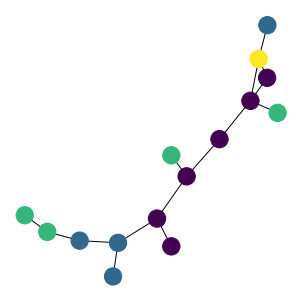

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Generate a network
n=10
G = nx.star_graph(n)

n = 15 
k = 2
p = 0.5
G = nx.watts_strogatz_graph(n, k, p)

# 2. Calculate measures for each node
deg = nx.degree_centrality(G) # gives a dictionary!!!
print(deg)
print(G.degree())
print(type(G.degree))# gives 'networkx.classes.reportviews.DegreeView'
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # gives array of degree values
print(degree_sequence) 


# 3. Draw network with node colors defined by degree
plt.figure(figsize = (4, 4)) # set size of figure
node_color = degree_sequence # assign node colors
nx.draw(G, node_color = degree_sequence)



In [8]:

G_er = nx.erdos_renyi_graph(20, 0.3)
betw = nx.betweenness_centrality(G_er) #returns dictionary
betw_sequence = np.array(betw.values()) # gives array of degree values
print(betw_sequence)
print( type(list(nx.betweenness_centrality(G_er).values())))
print('  ')

G_er = nx.erdos_renyi_graph(20, 0.3)
clust = nx.clustering(G_er) #returns dictionary
clust_sequence = np.array(betw.values()) # gives array of degree values
print(clust_sequence)


dict_values([0.05770739981266295, 0.018574213311055417, 0.03448203842940685, 0.0045321637426900575, 0.002680311890838206, 0.039135085187716766, 0.02681704260651629, 0.036709830130882755, 0.04211728816991975, 0.007797270955165692, 0.04281537176274018, 0.09640388850915166, 0.1468912179438495, 0.026796789954684694, 0.04249575960102275, 0.0721526037315511, 0.05497076023391813, 0.08026315789473681, 0.03184349763297131, 0.02370319738740791])
<class 'list'>
  
dict_values([0.05770739981266295, 0.018574213311055417, 0.03448203842940685, 0.0045321637426900575, 0.002680311890838206, 0.039135085187716766, 0.02681704260651629, 0.036709830130882755, 0.04211728816991975, 0.007797270955165692, 0.04281537176274018, 0.09640388850915166, 0.1468912179438495, 0.026796789954684694, 0.04249575960102275, 0.0721526037315511, 0.05497076023391813, 0.08026315789473681, 0.03184349763297131, 0.02370319738740791])
